## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Loading the dataset

In [2]:
df = pdr.get_data_tiingo('GOOG', api_key='c6b245bce4988bcab5553fb3a09c6840dd57510f')
df.head()

adjClose   adjHigh   adjLow  adjOpen  \
symbol date                                                              
GOOG   2015-10-07 00:00:00+00:00    642.36  650.6090  632.150   649.24   
       2015-10-08 00:00:00+00:00    639.16  644.4500  625.560   641.36   
       2015-10-09 00:00:00+00:00    643.61  645.9900  635.318   640.00   
       2015-10-12 00:00:00+00:00    646.67  648.5000  639.010   642.09   
       2015-10-13 00:00:00+00:00    652.30  657.8125  643.150   643.15   

                                  adjVolume   close  divCash      high  \
symbol date                                                              
GOOG   2015-10-07 00:00:00+00:00    2092714  642.36      0.0  650.6090   
       2015-10-08 00:00:00+00:00    2182081  639.16      0.0  644.4500   
       2015-10-09 00:00:00+00:00    1648736  643.61      0.0  645.9900   
       2015-10-12 00:00:00+00:00    1276134  646.67      0.0  648.5000   
       2015-10-13 00:00:00+00:00    1807685  652.30      0.0  657.8125   

                                      low    open  splitFactor   volume  
symbol date                                                              
GOOG   2015-10-07 00:00:00+00:00  632.150  649.24          1.0  2092714  
       2015-10-08 00:00:00+00:00  625.560  641.36          1.0  2182081  
       2015-10-09 00:00:00+00:00  635.318  640.00          1.0  1648736  
       2015-10-12 00:00:00+00:00  639.010  642.09          1.0  1276134  
       2015-10-13 00:00:00+00:00  643.150  643.15          1.0  1807685

In [3]:
df.shape

(1257, 12)

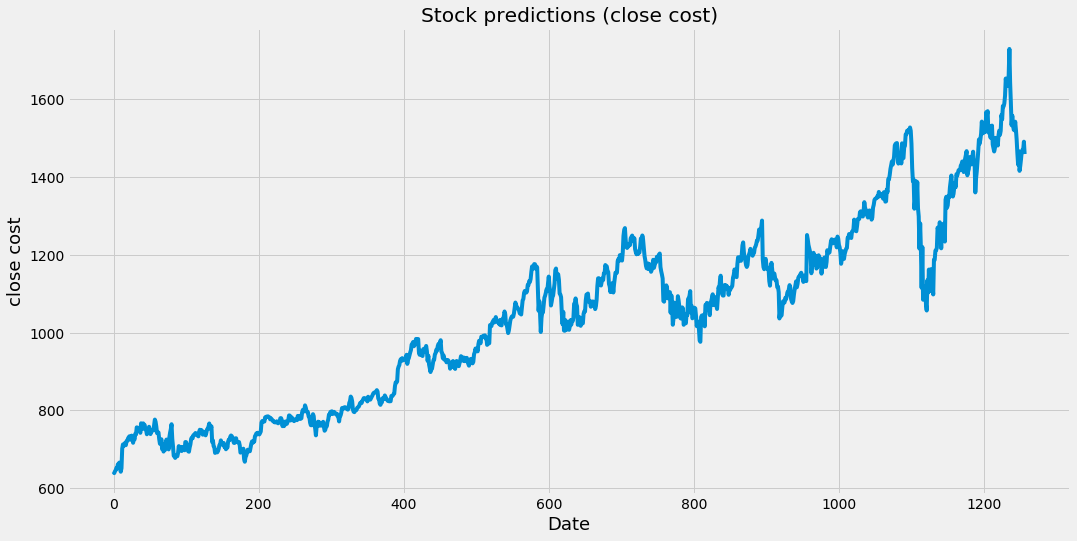

In [4]:
plt.style.use('fivethirtyeight')

# define data only for close cost
df1 = df.reset_index()['close']

# Visualising close cost 
plt.figure(figsize=(16,8))
plt.title('Stock predictions (close cost)')
plt.plot(df1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('close cost', fontsize=18)
plt.show()

In [5]:
# Converting dataframe into numpy array
dataset = np.array(df1).reshape(-1,1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print('scaled data:- \n', scaled_data)

scaled data:- 
 [[0.00293815]
 [0.        ]
 [0.00408587]
 ...
 [0.76248715]
 [0.7813005 ]
 [0.75222198]]


In [6]:
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.7)
print('training_data_len-->', training_data_len)

training_data_len--> 880


## Create the training data set

In [7]:
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])


In [8]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data; used by lstm model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print('x_train_len-->', x_train.shape)

x_train_len--> (780, 100, 1)


In [9]:
x_train.shape

(780, 100, 1)

## Build the LSTM model

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=100)

W1005 12:39:21.604573 12392 deprecation_wrapper.py:119] From C:\Users\LENOVO\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/100
780/780 [==============================] - 10s 13ms/step - loss: 0.0314
Epoch 2/100
780/780 [==============================] - 6s 7ms/step - loss: 0.0044
Epoch 3/100
780/780 [==============================] - 5s 6ms/step - loss: 0.0021
Epoch 4/100
780/780 [==============================] - 5s 6ms/step - loss: 0.0012
Epoch 5/100
780/780 [==============================] - 5s 6ms/step - loss: 7.1592e-04
Epoch 6/100
780/780 [==============================] - 5s 6ms/step - loss: 7.5851e-04
Epoch 7/100
780/780 [==============================] - 5s 6ms/step - loss: 6.7852e-04
Epoch 8/100
780/780 [==============================] - 5s 6ms/step - loss: 6.7485e-04
Epoch 9/100
780/780 [==============================] - 5s 6ms/step - loss: 6.6533e-04
Epoch 10/100
780/780 [==============================] - 5s 6ms/step - loss: 6.6730e-04
Epoch 11/100
780/780 [==============================] - 5s 6ms/step - loss: 6.4680e-04
Epoch 12/100
780/780 [==============================] - 5s 6ms/ste

780/780 [==============================] - 5s 6ms/step - loss: 2.4700e-04
Epoch 96/100
780/780 [==============================] - 6s 8ms/step - loss: 2.5552e-04
Epoch 97/100
780/780 [==============================] - 5s 6ms/step - loss: 2.3049e-04
Epoch 98/100
780/780 [==============================] - 5s 7ms/step - loss: 2.2616e-04
Epoch 99/100
780/780 [==============================] - 5s 6ms/step - loss: 2.3238e-04
Epoch 100/100
780/780 [==============================] - 6s 7ms/step - loss: 2.2313e-04


## Create the testing data set

In [13]:
# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 100: , :]

# Split the data into x_train and y_train data sets
x_test = []
y_test = []

for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    y_test.append(test_data[i, 0])


In [14]:
# Convert the x_test and y_test to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print('x_test_len-->', x_test.shape)

x_test_len--> (377, 100, 1)


In [15]:
# Get the models predicted values
predictions = model.predict(x_test)
print(predictions.shape)
predictions = scaler.inverse_transform(predictions)

(377, 1)


In [16]:
# getting the actual values
y_test2 = scaler.inverse_transform(y_test.reshape(-1, 1))

In [17]:
# Getting the rmse value
var = 0
for i in range(len(predictions)):
    var += (predictions[i][0] - y_test2[i][0]) ** 2 
mse = var / len(y_test2)
rmse = math.sqrt(mse)
rmse

31.552869784606774

## To make date feature as id for the data

In [18]:
# getting only date column for plotting purpose.
date_data = df.reset_index()
date_data.head()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
0,GOOG,2015-10-07 00:00:00+00:00,642.36,650.6090,632.150,649.24,2092714,642.36,0.0,650.6090,632.150,649.24,1.0,2092714
1,GOOG,2015-10-08 00:00:00+00:00,639.16,644.4500,625.560,641.36,2182081,639.16,0.0,644.4500,625.560,641.36,1.0,2182081
2,GOOG,2015-10-09 00:00:00+00:00,643.61,645.9900,635.318,640.00,1648736,643.61,0.0,645.9900,635.318,640.00,1.0,1648736
3,GOOG,2015-10-12 00:00:00+00:00,646.67,648.5000,639.010,642.09,1276134,646.67,0.0,648.5000,639.010,642.09,1.0,1276134
4,GOOG,2015-10-13 00:00:00+00:00,652.30,657.8125,643.150,643.15,1807685,652.30,0.0,657.8125,643.150,643.15,1.0,1807685


In [19]:
date_data['date'].dt.date

0       2015-10-07
1       2015-10-08
2       2015-10-09
3       2015-10-12
4       2015-10-13
5       2015-10-14
6       2015-10-15
7       2015-10-16
8       2015-10-19
9       2015-10-20
10      2015-10-21
11      2015-10-22
12      2015-10-23
13      2015-10-26
14      2015-10-27
15      2015-10-28
16      2015-10-29
17      2015-10-30
18      2015-11-02
19      2015-11-03
20      2015-11-04
21      2015-11-05
22      2015-11-06
23      2015-11-09
24      2015-11-10
25      2015-11-11
26      2015-11-12
27      2015-11-13
28      2015-11-16
29      2015-11-17
           ...    
1227    2020-08-21
1228    2020-08-24
1229    2020-08-25
1230    2020-08-26
1231    2020-08-27
1232    2020-08-28
1233    2020-08-31
1234    2020-09-01
1235    2020-09-02
1236    2020-09-03
1237    2020-09-04
1238    2020-09-08
1239    2020-09-09
1240    2020-09-10
1241    2020-09-11
1242    2020-09-14
1243    2020-09-15
1244    2020-09-16
1245    2020-09-17
1246    2020-09-18
1247    2020-09-21
1248    2020

In [20]:
df = df.reset_index()

In [21]:
df['only_date'] = date_data['date'].dt.date

In [22]:
df = pd.DataFrame.set_index(df , df['only_date'])

In [23]:
df.head()

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume,only_date
only_date,,,,,,,,,,,,,,,
2015-10-07,GOOG,2015-10-07 00:00:00+00:00,642.36,650.6090,632.150,649.24,2092714,642.36,0.0,650.6090,632.150,649.24,1.0,2092714,2015-10-07
2015-10-08,GOOG,2015-10-08 00:00:00+00:00,639.16,644.4500,625.560,641.36,2182081,639.16,0.0,644.4500,625.560,641.36,1.0,2182081,2015-10-08
2015-10-09,GOOG,2015-10-09 00:00:00+00:00,643.61,645.9900,635.318,640.00,1648736,643.61,0.0,645.9900,635.318,640.00,1.0,1648736,2015-10-09
2015-10-12,GOOG,2015-10-12 00:00:00+00:00,646.67,648.5000,639.010,642.09,1276134,646.67,0.0,648.5000,639.010,642.09,1.0,1276134,2015-10-12
2015-10-13,GOOG,2015-10-13 00:00:00+00:00,652.30,657.8125,643.150,643.15,1807685,652.30,0.0,657.8125,643.150,643.15,1.0,1807685,2015-10-13


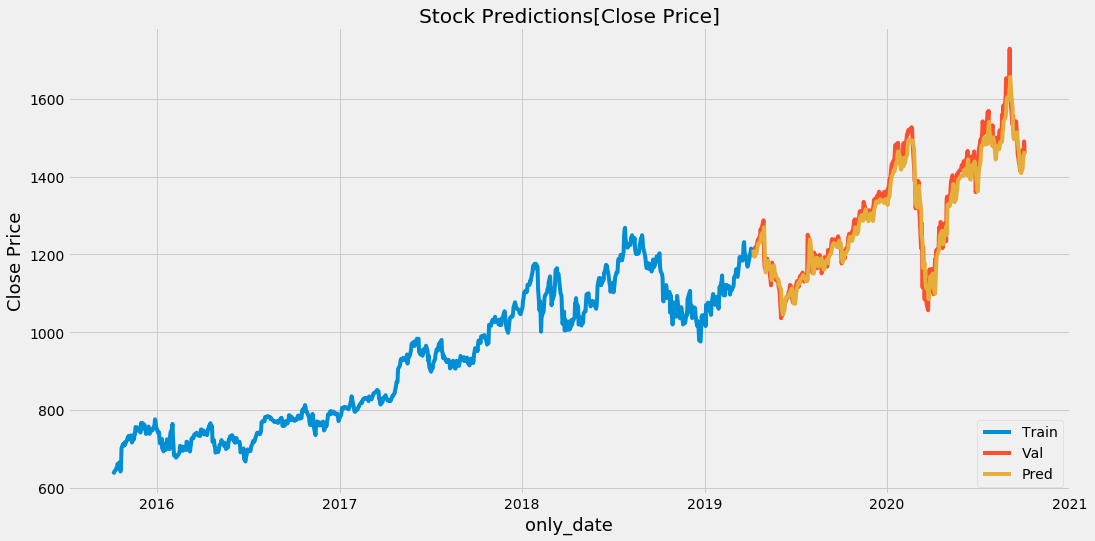

In [24]:
# Plot the data(train + val + predictions)

train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

# Visualization
plt.figure(figsize=(16,8))
plt.title('Stock Predictions[Close Price]')
plt.xlabel('only_date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Pred'], loc='lower right')
plt.show()

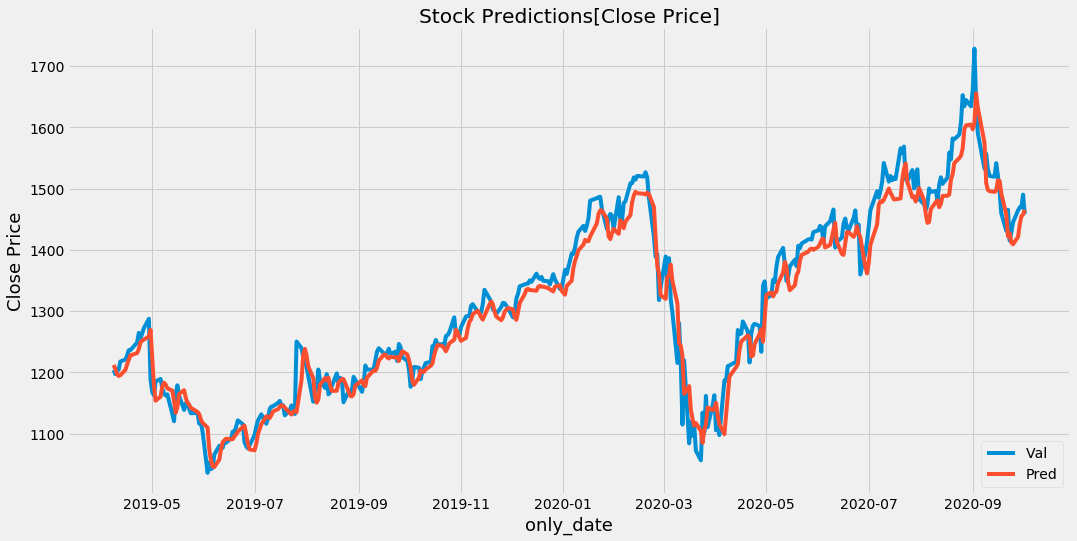

In [25]:
# Plot the data(val + prediction)
data  = df.filter(['close'])

valid = df[training_data_len:]
valid['Predictions'] = predictions

# Visualization
plt.figure(figsize=(16,8))
plt.title('Stock Predictions[Close Price]')
plt.xlabel('only_date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

plt.plot(valid[['close', 'Predictions']])
plt.legend([ 'Val', 'Pred'], loc='lower right')
plt.show()